# Data Wrangling:

Data wrangling is an important function in processing the data. The most common features done in wrangling are fairly elementary and yet have significant impact on final analysis of data.

# Description of data:

While searching for some health industry related data, I accidentally jumped into these two data sets published in the website of World Health Organisation(link is given below). It is about Tuberoculosis(TB) disease. 

The first dataset describes the countrywise distribution of allocation of budgets towards eradication measures related to various forms of TB diseases and the second data is about the expense side.

As common sense dictates, the budget and expenses must be related. However on preliminary investigation, it may not be very surprising to find that there can be discripiencies between budget and expenses. There can be instances that fund is being allocated yet not being spent which may be leading to higher occurance of the disease.

So, we have an interesting set up to anticipate before we begin the analysis.

#https://www.who.int/tb/country/data/download/en/


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv('TB_budget_2019-12-19.csv')
df1.head()


,country,iso2,iso3,iso_numeric,g_whoregion,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
0,Afghanistan,AF,AFG,4,EMR,2018,52000.0,40.0,450.0,1400.0,...,344940.0,NaN,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,AF,AFG,4,EMR,2019,53000.0,50.0,585.0,1500.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Albania,AL,ALB,8,EUR,2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,AL,ALB,8,EUR,2019,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,DZ,DZA,12,AFR,2018,23000.0,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning:

The most important step after uploading the data to dataframe is data cleaning. We observe that both the data sets though being small(432 countries in total) is a relatively high dimensional data. 

Second, many of the entries in the data sets are n/a. So the question arises: how do we deal with the missing values?

## Eternal debate of  'mean vs median':

I conisdered two options: replacing those etnries with mean and replacing with median values. Since there is high variability in the data among many countries(some may be super rich and some may be in abject poverty), median is a better candidate for replacement.

(The other by default option is to drop all together the 'n/a' cases. But, then what will be left with to do analysis in this case?)


In [18]:
df1.shape

(432, 39)

In [19]:
#dropping some of the apparently less important columns
df1=df1.drop(['iso2','year','iso3','iso_numeric','g_whoregion'], axis=1)
df1.head()

,country,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,tx_xdr,budget_cpp_xdr,budget_lab,cf_lab,budget_staff,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
0,Afghanistan,52000.0,40.0,450.0,1400.0,12.0,3100.0,2543262.0,2473391.0,761828.0,...,344940.0,NaN,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,53000.0,50.0,585.0,1500.0,15.0,2000.0,2797414.0,2208668.0,915527.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,23000.0,NaN,100.0,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2 = pd.read_csv('TB_expenditure_utilisation_2019-12-19.csv')
df2.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,exp_cpp_dstb,exp_cpp_mdr,exp_cpp_xdr,exp_lab,...,rcvd_tot_usaid,rcvd_tot_grnt,rcvd_tot_sources,hcfvisit_dstb,hcfvisit_mdr,hospd_dstb_prct,hospd_mdr_prct,hospd_dstb_dur,hospd_mdr_dur,hosp_type_mdr
0,Afghanistan,AF,AFG,4,EMR,2017,40.0,1400.0,3100.0,2463321.0,...,3400000.0,4583464.0,12071477.0,12.0,256.0,2.0,100.0,15.0,240.0,142.0
1,Afghanistan,AF,AFG,4,EMR,2018,50.0,1500.0,2000.0,1471438.0,...,4075745.0,3826357.0,12400144.0,72.0,236.0,1.0,90.0,10.0,180.0,142.0
2,Albania,AL,ALB,8,EUR,2017,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34.0,NaN,80.0,NaN,20.0,NaN,2.0
3,Albania,AL,ALB,8,EUR,2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,0.0,78.0,0.0,18.0,0.0,2.0
4,Algeria,DZ,DZA,12,AFR,2017,34.0,605.0,NaN,NaN,...,NaN,NaN,810820.0,17.0,50.0,10.0,100.0,10.0,30.0,142.0


In [7]:
df2.shape

(432, 43)

In [23]:
df2=df2.drop(['iso2','year','iso3','iso_numeric','g_whoregion'], axis=1)
df2.head()

,country,exp_cpp_dstb,exp_cpp_mdr,exp_cpp_xdr,exp_lab,rcvd_lab,exp_staff,rcvd_staff,exp_fld,rcvd_fld,...,rcvd_tot_usaid,rcvd_tot_grnt,rcvd_tot_sources,hcfvisit_dstb,hcfvisit_mdr,hospd_dstb_prct,hospd_mdr_prct,hospd_dstb_dur,hospd_mdr_dur,hosp_type_mdr
0,Afghanistan,40.0,1400.0,3100.0,2463321.0,2463321.0,625971.0,625971.0,3073211.0,3073211.0,...,3400000.0,4583464.0,12071477.0,12.0,256.0,2.0,100.0,15.0,240.0,142.0
1,Afghanistan,50.0,1500.0,2000.0,1471438.0,1471438.0,706095.0,706095.0,2828527.0,2828527.0,...,4075745.0,3826357.0,12400144.0,72.0,236.0,1.0,90.0,10.0,180.0,142.0
2,Albania,45.0,1618.0,3903.0,803790.0,889214.0,952178.0,989251.0,434280.0,496588.5,...,0.0,25000.0,6511315.0,34.0,129.0,80.0,80.0,20.0,60.0,2.0
3,Albania,45.0,1618.0,3903.0,803790.0,889214.0,952178.0,989251.0,434280.0,496588.5,...,0.0,25000.0,6511315.0,30.0,0.0,78.0,0.0,18.0,0.0,2.0
4,Algeria,34.0,605.0,3903.0,803790.0,889214.0,952178.0,989251.0,774520.0,774520.0,...,0.0,25000.0,810820.0,17.0,50.0,10.0,100.0,10.0,30.0,142.0


## Description of some of the predictors:

There is limited number of information I could gather which explains the predictors involved in these two data sets.

budget_cpp_dstb: Budget allocated towards research in 'Drug resistent TB'

exp_cpp_dstb:  Expenses incured towards research in 'Drug resistent TB'

exp_lab: Budget allocated towards research labroaratory on TB.

budget_lab: Expenses incured towards research labroaratory on TB.

budget_tot: Total budget

In [21]:
df1=df1.fillna(df1.median())
df1.head()

,country,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,tx_xdr,budget_cpp_xdr,budget_lab,cf_lab,budget_staff,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
0,Afghanistan,52000.0,40.0,450.0,1400.0,12.0,3100.0,2543262.0,2473391.0,761828.0,...,344940.0,323204.5,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,53000.0,50.0,585.0,1500.0,15.0,2000.0,2797414.0,2208668.0,915527.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Albania,8505.0,46.0,137.5,1830.0,5.0,4800.0,1139023.5,822717.0,1245001.0,...,42316.5,323204.5,189917.0,0.0,6423616.0,2191214.0,2422356.0,0.0,28564.0,6423616.0
3,Albania,8505.0,46.0,137.5,1830.0,5.0,4800.0,1139023.5,822717.0,1245001.0,...,42316.5,323204.5,189917.0,6457444.0,6423616.0,2191214.0,2422356.0,0.0,28564.0,6423616.0
4,Algeria,23000.0,46.0,100.0,1830.0,10.0,4800.0,1139023.5,822717.0,1245001.0,...,42316.5,323204.5,189917.0,6457444.0,6423616.0,2191214.0,2422356.0,0.0,28564.0,6423616.0


In [24]:
df2=df2.fillna(df2.median())
df2.head()

,country,exp_cpp_dstb,exp_cpp_mdr,exp_cpp_xdr,exp_lab,rcvd_lab,exp_staff,rcvd_staff,exp_fld,rcvd_fld,...,rcvd_tot_usaid,rcvd_tot_grnt,rcvd_tot_sources,hcfvisit_dstb,hcfvisit_mdr,hospd_dstb_prct,hospd_mdr_prct,hospd_dstb_dur,hospd_mdr_dur,hosp_type_mdr
0,Afghanistan,40.0,1400.0,3100.0,2463321.0,2463321.0,625971.0,625971.0,3073211.0,3073211.0,...,3400000.0,4583464.0,12071477.0,12.0,256.0,2.0,100.0,15.0,240.0,142.0
1,Afghanistan,50.0,1500.0,2000.0,1471438.0,1471438.0,706095.0,706095.0,2828527.0,2828527.0,...,4075745.0,3826357.0,12400144.0,72.0,236.0,1.0,90.0,10.0,180.0,142.0
2,Albania,45.0,1618.0,3903.0,803790.0,889214.0,952178.0,989251.0,434280.0,496588.5,...,0.0,25000.0,6511315.0,34.0,129.0,80.0,80.0,20.0,60.0,2.0
3,Albania,45.0,1618.0,3903.0,803790.0,889214.0,952178.0,989251.0,434280.0,496588.5,...,0.0,25000.0,6511315.0,30.0,0.0,78.0,0.0,18.0,0.0,2.0
4,Algeria,34.0,605.0,3903.0,803790.0,889214.0,952178.0,989251.0,774520.0,774520.0,...,0.0,25000.0,810820.0,17.0,50.0,10.0,100.0,10.0,30.0,142.0


# Data Exploration:

We first plot two different columns from the different data sets to uncover some relationship.


Text(0, 0.5, 'Expenses on drug-susceptible TB')

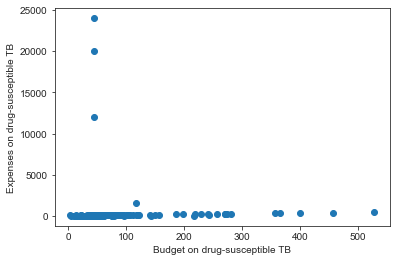

In [39]:
plt.scatter(df2['exp_cpp_dstb'], df1['budget_cpp_dstb'])
plt.xlabel('Budget on drug-susceptible TB')
plt.ylabel('Expenses on drug-susceptible TB')

# 
From the above plot, it is clear that there are number of cases where the budget has been allocated towards research on drug-susceptible TB yet not much has been spent.

Next plot is about budget allocation towards labroratory and its expenses. There is fairly linear relatiosnhip between the two as apparent from the plot.


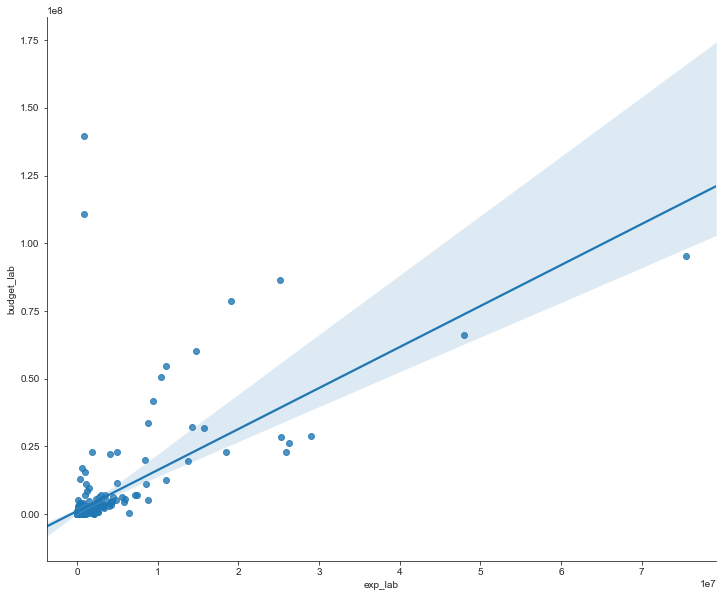

In [37]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.regplot(df2['exp_lab'], df1['budget_lab'],scatter=True, fit_reg=True, ax=ax)
sns.despine()

## Correlation matrix:

The following matrix with heat map shows the correlation between various predictors. This helps in dropping some of predictors which have significant dependency on some other variables. Coeeficients higher than 0.7 will be considered highly correlated. We can drop one of the correlated variables to reduce dimensions.

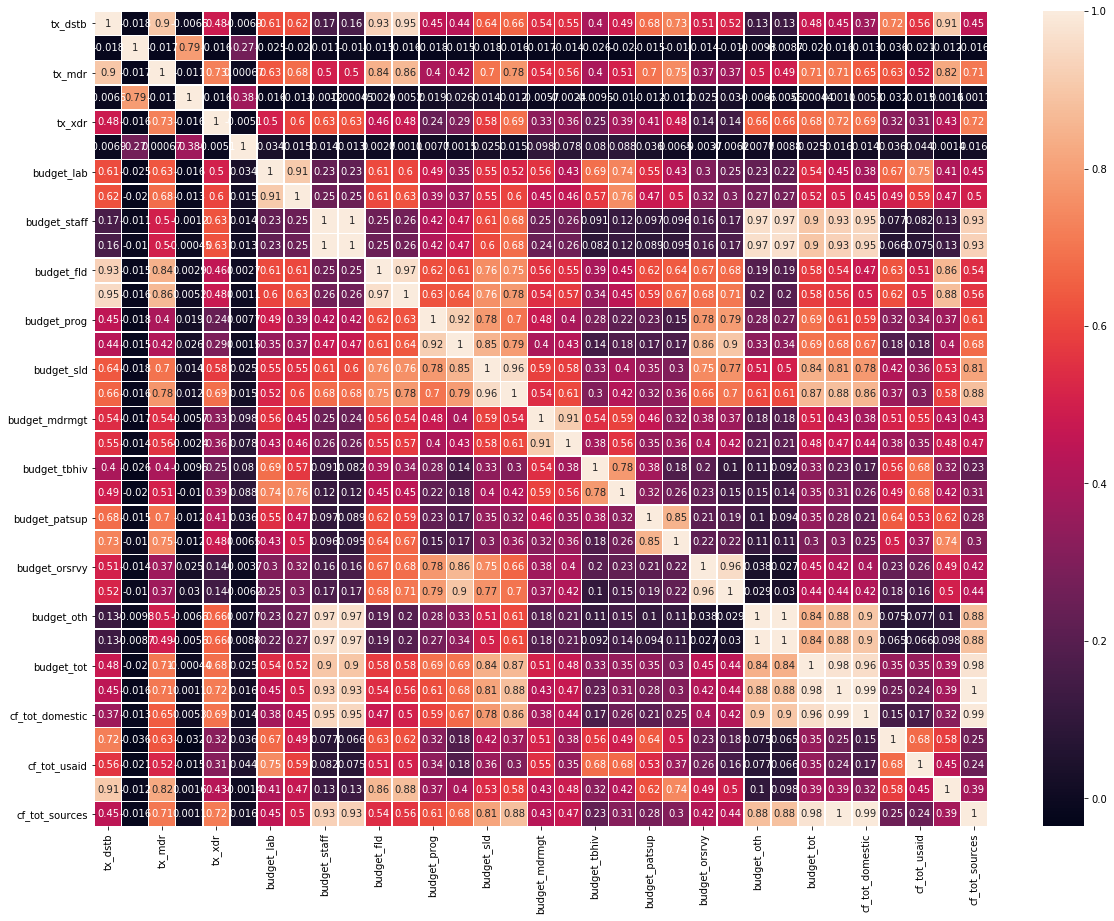

In [32]:
#correlation matrix for model-1
sns.heatmap(df1.corr(), annot=True, linewidth=0.5)
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.show()

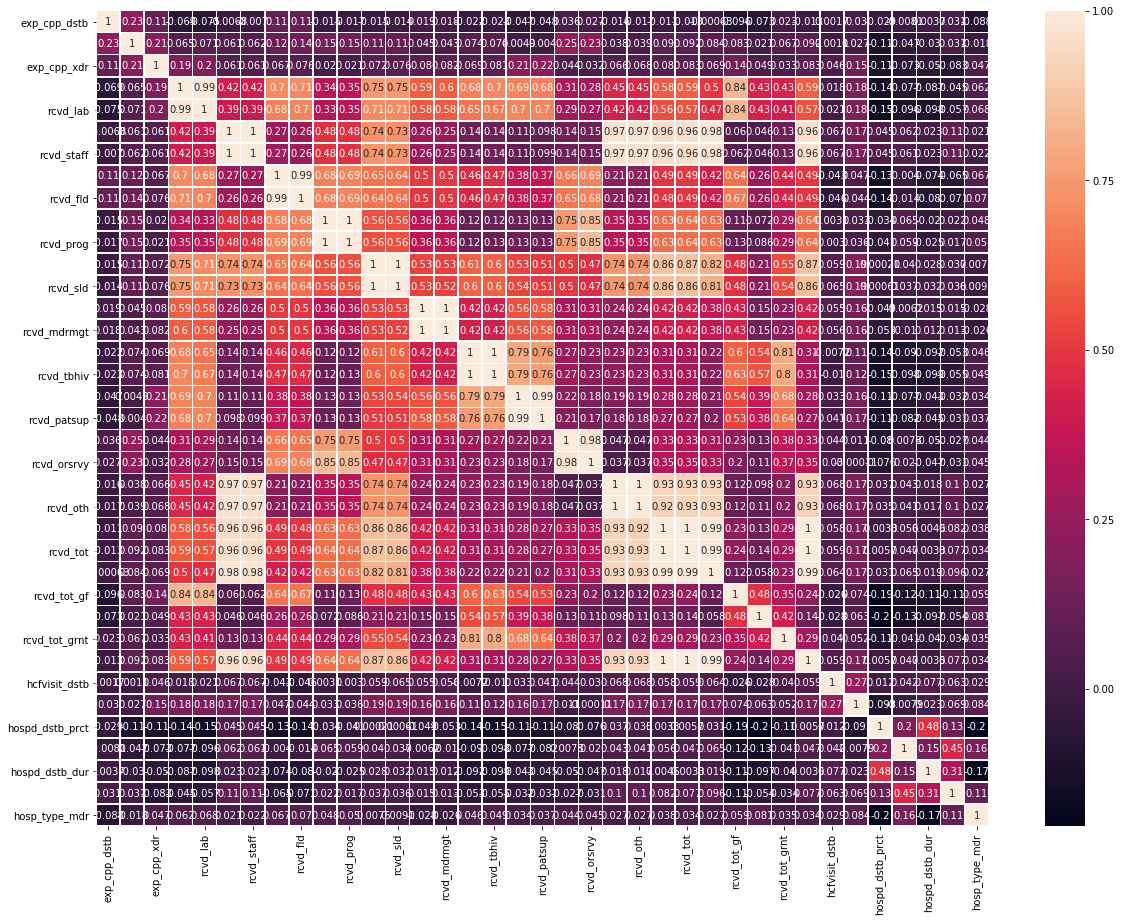

In [33]:
#correlation matrix for model-2
sns.heatmap(df2.corr(), annot=True, linewidth=0.5)
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.show()

# Data Merging:

We have chosen two smaller datasets for effective illustration of the process involved. 

We will then merge those two to do further analysis.

In [44]:
#choosing smaller datasets to do analysis 
dfs1 = df1[['country', 'budget_cpp_dstb', 'budget_cpp_mdr', 'budget_lab', 'cf_tot_domestic']]
dfs2 = df2[['country', 'exp_cpp_dstb', 'exp_cpp_mdr', 'exp_lab', 'rcvd_tot_domestic' ]]

In [45]:
dfs1.head()

,country,budget_cpp_dstb,budget_cpp_mdr,budget_lab,cf_tot_domestic
0,Afghanistan,40.0,1400.0,2543262.0,533779.0
1,Afghanistan,50.0,1500.0,2797414.0,511854.0
2,Albania,46.0,1830.0,1139023.5,2191214.0
3,Albania,46.0,1830.0,1139023.5,2191214.0
4,Algeria,46.0,1830.0,1139023.5,2191214.0


In [40]:
for col in df2.columns: 
    print(col)

country
exp_cpp_dstb
exp_cpp_mdr
exp_cpp_xdr
exp_lab
rcvd_lab
exp_staff
rcvd_staff
exp_fld
rcvd_fld
exp_prog
rcvd_prog
exp_sld
rcvd_sld
exp_mdrmgt
rcvd_mdrmgt
exp_tbhiv
rcvd_tbhiv
exp_patsup
rcvd_patsup
exp_orsrvy
rcvd_orsrvy
exp_oth
rcvd_oth
exp_tot
rcvd_tot
rcvd_tot_domestic
rcvd_tot_gf
rcvd_tot_usaid
rcvd_tot_grnt
rcvd_tot_sources
hcfvisit_dstb
hcfvisit_mdr
hospd_dstb_prct
hospd_mdr_prct
hospd_dstb_dur
hospd_mdr_dur
hosp_type_mdr


In [46]:
#merging the two data sets
merged_tb = pd.merge(left=dfs1,right=dfs2, left_on=None, right_on=None)
merged_tb.head()

,country,budget_cpp_dstb,budget_cpp_mdr,budget_lab,cf_tot_domestic,exp_cpp_dstb,exp_cpp_mdr,exp_lab,rcvd_tot_domestic
0,Afghanistan,40.0,1400.0,2543262.0,533779.0,40.0,1400.0,2463321.0,2216505.0
1,Afghanistan,40.0,1400.0,2543262.0,533779.0,50.0,1500.0,1471438.0,551664.0
2,Afghanistan,50.0,1500.0,2797414.0,511854.0,40.0,1400.0,2463321.0,2216505.0
3,Afghanistan,50.0,1500.0,2797414.0,511854.0,50.0,1500.0,1471438.0,551664.0
4,Albania,46.0,1830.0,1139023.5,2191214.0,45.0,1618.0,803790.0,2216505.0


## Data exploration for this smaller data set:

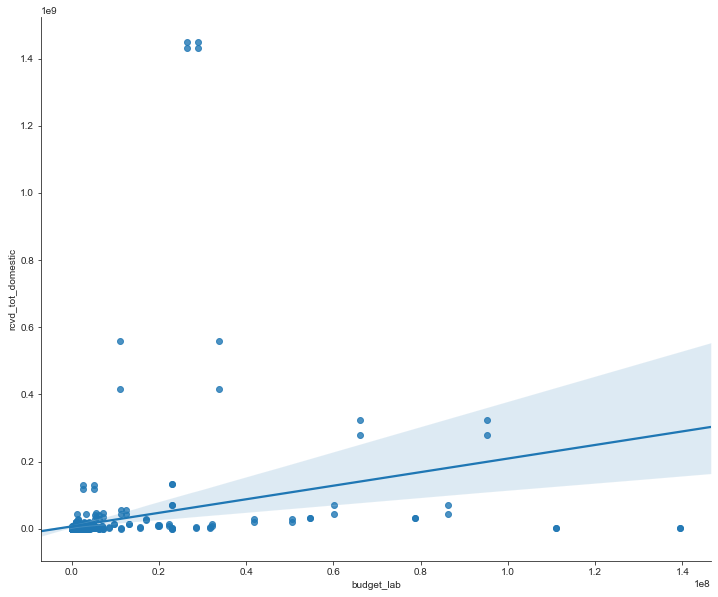

In [47]:
#plotting two predictors and obesrving relationship
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.regplot(merged_tb['budget_lab'], merged_tb['rcvd_tot_domestic'],scatter=True, fit_reg=True, ax=ax)
sns.despine()

# 
We can clearly see there is some what relationship between budget allocated towards labroratory and total budget received. That means higher allocation of fund in total leads to higher allocation of fund towards labroratory research.

This linear relationship motivates us to explorae regression between the two variables.

### Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
import math

# Linear Regression 

regression = LinearRegression()
regression.fit(math.log(merged_tb['budget_lab']), math.log(merged_tb['rcvd_tot_domestic']))

# Conclusion:

As we clearly see data wrangling helps us above in exploring some important aspects of over all situation(in this case TB eradication). We can play more with the two data sets to come up with more meaningful relations.